# Applied Finance: the Sharpe Ratio

## 1 Introduction to Risk and Return

Data analysis is highly versatile and currently widely applied in even non-STEM areas such as finance, law, and marketing. Finance is a multi-faceted field that involves a fair amount of quantitative reasoning and decision making. For people working in finance, they can exploit the machines' immense potential in reading in colossal amounts of data, recognising features, extrapolating trends and predicting probable outcomes. I am sure that all finance professionals would agree that time is money and would love to have automated data analysis tools to make their decision-making processes more efficient than ever. 

Investment is a risky business. Some people win, meaning that there are always some other people who lose. Therefore, a reliable risk assessment is pivotal to making successful investments. One way to quantify the ratio between risk and return is the Sharpe ratio, introduced by William F. Sharpe in 1966, earning him a Nobel Prize.

The mathematics for the Sharpe Ratio is actually quite straight-forward:

<h2><center> $ \textit{Sharpe Ratio} = \frac{R_{p} - R_{f}}{\sigma _{p}} $ </center></h2>

There are only three variables. $R_{p}$ denotes the total return from the portfolio, and $R_{f}$ is a benchmark value representing the revenue from an investment in risk-free assets (normally chosen as the U.S. government T-Bill - just something with minimal risk). Finally, $\sigma_{p}$ denotes the standard deviation of $R_{p}$, which can be understood as a measurement of the volatility of the assets you invest in.

To interpret the Sharpe Ratio, we should first remember that by investing in assets with higher risks, we expect a potentially higher revenue (i.e. $R_{p} > R_{f}$) - most of the time, anyway. **Therefore, the Sharpe Ratio measures how much extra revenue is gained per unit of high volatility endured, which is expected when dealing with riskier assets.**

The above conclusion indicates that an ideal Sharpe Ratio is a **HIGH** one. 

## 2 Finding & Reading Data

First and foremost, let us import all the standard data analysis packages and initialise MatPlotLib. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# These are Pandas Dataframe display settings to make the dataframes look better

Let's say we want to determine which one or ones of the S&P 500 companies we want to invest in. We will examine their stock indices, which are measurements of the performance of the 500 largest companies in the United States. They will be the values we use for $R_{p}$. 

For the benchmark risk-free value $R_{f}$ - well, there is no "risk-free" in stock investments, but we will substitute the risk-free rate with the information ratio. It is another benchmark value commonly used for portfolio management, and measures the excess return per unit additional risk taken, relative to simply investing in a low cost-index fund.

All data used for the project is downloaded from [MarketWatch](https://www.marketwatch.com/) where it is freely available, and we are only looking at DAILY stock indices of the past year (from August 27, 2020 to August 27, 2021), excluding weekends and holidays of course.

Suppose that we are stock market novices and just want to consider investing in the top 25 companies of the S&P 500, as they are usually safe choices. Here are the names of the S&P top 25 companies as of August 30, 2021 according to [Investopedia](https://www.investopedia.com/ask/answers/08/find-stocks-in-sp500.asp). Most of them are tech-giants or international banks. Their stock prices are used to calculate the $R_{p}$ values, and are stored in [stocks.csv](https://github.com/cassandrazhou/sharpe_ratio/blob/main/stocks.csv). The benchmark values are stored in [benchmark.csv](https://github.com/cassandrazhou/sharpe_ratio/blob/main/benchmark.csv).

1. Apple Inc. (AAPL)

1. Microsoft Corp. (MSFT)

1. Amazon.com Inc. (AMZN)

1. Facebook Inc. Class A (FB)

1. Alphabet Inc. Class A (GOOGL)

1. Alphabet Inc. Class C (GOOG)

1. Tesla Inc. (TSLA)

1. Berkshire Hathaway Inc. Class B (BRK.B)

1. NVIDIA Corp. (NVDA)

1. JPMorgan Chase & Co (JPM)

1. Johnson & Johnson (JNJ)

1. Visa Inc. Class A (V)

1. UnitedHealth Group Inc. (UNH)

1. Paypal Holdings Inc. (PYPL)

1. Home Depot Inc. (HD)

1. Procter & Gamble Co. (PG)

1. Mastercard Inc. Class A (MA)

1. Walt Disney Co. (DIS)

1. Bank of America Corp. (BAC)

1. Adobe Inc. (ADBE)

1. Exxon Mobil Corp. (XOM)

1. Comcast Corp. Class A (CMCSA)

1. Netflix Inc. (NFLX)

1. Verizon Communications Inc. (VZ)

1. Intel Corp. (INTC)

We are now ready to read the csv files into Pandas Dataframes.

In [17]:
df_stocks = pd.read_csv("stocks.csv", parse_dates = ["Date"], index_col = "Date").dropna()
df_benchmark = pd.read_csv("benchmark.csv", parse_dates = ["Date"], index_col = "Date").dropna()

# The dropna() function deletes any datapoint without a value

In [18]:
df_stocks.head()

# First five rows of the Stocks Dataframe

,Apple Inc. (AAPL),Microsoft Corp. (MSFT),Amazon.com Inc. (AMZN),Facebook Inc. Cl A (FB),Alphabet Inc. Cl A (GOOGL),Alphabet Inc. Cl C (GOOG),Tesla Inc. (TSLA),Berkshire Hathaway Inc. Cl B (BRK.B),NVIDIA Corp. (NVDA),JPMorgan Chase & Co. (JPM),Johnson & Johnson (JNJ),Visa Inc. Cl A (V),UnitedHealth Group Inc. (UNH),PayPal Holdings Inc. (PYPL),Home Depot Inc. (HD),Procter & Gamble Co. (PG),Mastercard Inc. (MA),Walt Disney Co. (DIS),Bank of America Corp. (BAC),Adobe Inc. (ADBE),Exxon Mobil Corp. (XOM),Comcast Corp. Cl A (CMCSA),Netflix Inc. (NFLX),Verizon Communications Inc. (VZ),Intel Corp. (INTC)
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-27,148.60,299.72,3349.63,372.63,2880.08,2891.01,711.92,286.60,226.36,163.05,172.93,232.69,418.76,278.33,323.38,142.31,355.73,180.14,42.49,658.52,55.77,59.40,558.92,54.77,53.89
2021-08-26,147.54,299.09,3316.00,364.38,2828.81,2842.46,701.16,285.27,220.68,161.75,173.30,230.52,416.85,273.62,321.48,142.42,352.86,176.56,42.04,652.39,54.71,59.00,550.12,54.60,53.13
2021-08-25,148.36,302.01,3299.18,368.39,2841.58,2859.00,711.20,287.30,222.13,160.92,174.23,232.59,419.74,277.69,323.88,142.67,359.10,178.31,42.15,656.80,55.46,59.48,547.58,54.93,53.81
2021-08-24,149.62,302.62,3305.78,365.51,2825.23,2847.97,708.49,286.02,217.93,157.67,175.39,234.24,423.41,279.51,324.90,143.18,361.78,178.47,41.48,657.24,55.36,59.53,553.41,55.01,53.81
2021-08-23,149.71,304.65,3265.87,363.35,2800.83,2821.99,706.30,285.62,219.58,156.70,177.61,234.14,425.36,276.98,327.74,144.35,361.01,177.66,40.91,656.86,54.91,59.80,553.33,55.42,53.23


In [19]:
df_benchmark.head()

# First five rows of the Benchmark Dataframe

,S&P 500
Date,
2021-08-27,4509.37
2021-08-26,4470.00
2021-08-25,4496.19
2021-08-24,4486.23
2021-08-23,4479.53


We have now correctly read in the data into corresponding dataframes, and are ready for data analysis.

## 3 Data Visualisation

It is generally good practice to visualise the data prior to any analysis, so we can get a sense of some important characteristics of the data, e.g. how many data points there are, what the distribution looks like, what the approximate variance and bias are and so on.

### 3.1 Stocks

In [20]:
df_stocks.describe()

# We can pay most of our attention to the mean and standard deviation

,Apple Inc. (AAPL),Microsoft Corp. (MSFT),Amazon.com Inc. (AMZN),Facebook Inc. Cl A (FB),Alphabet Inc. Cl A (GOOGL),Alphabet Inc. Cl C (GOOG),Tesla Inc. (TSLA),Berkshire Hathaway Inc. Cl B (BRK.B),NVIDIA Corp. (NVDA),JPMorgan Chase & Co. (JPM),Johnson & Johnson (JNJ),Visa Inc. Cl A (V),UnitedHealth Group Inc. (UNH),PayPal Holdings Inc. (PYPL),Home Depot Inc. (HD),Procter & Gamble Co. (PG),Mastercard Inc. (MA),Walt Disney Co. (DIS),Bank of America Corp. (BAC),Adobe Inc. (ADBE),Exxon Mobil Corp. (XOM),Comcast Corp. Cl A (CMCSA),Netflix Inc. (NFLX),Verizon Communications Inc. (VZ),Intel Corp. (INTC)
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,128.419209,240.218696,3263.287787,297.650158,2059.208617,2083.234980,623.324822,250.059763,150.873162,136.568854,159.601067,217.598854,364.029605,243.642372,294.283478,136.398379,353.516877,166.626403,34.134901,510.608538,49.865850,52.548538,516.485099,57.629407,54.905692
std,10.696262,27.006340,161.683021,35.462743,392.651166,411.088142,132.095289,28.366696,27.082193,22.882563,9.925733,15.059272,38.575044,35.465847,24.290947,4.837975,21.464277,23.062685,6.526352,56.835496,10.206196,4.901422,24.028300,1.840833,5.563255
min,106.840000,200.390000,2951.950000,245.640000,1409.390000,1415.210000,330.210000,200.700000,115.930000,92.660000,137.110000,180.870000,292.140000,175.790000,250.930000,122.150000,288.640000,118.470000,23.260000,421.200000,31.570000,41.400000,469.960000,54.150000,44.110000
25%,120.710000,216.340000,3149.840000,268.400000,1740.510000,1746.780000,563.000000,227.010000,131.910000,118.300000,149.900000,206.440000,332.990000,211.390000,273.190000,134.280000,336.510000,148.010000,28.220000,473.440000,39.940000,49.140000,497.980000,56.200000,50.670000
50%,127.140000,235.770000,3236.080000,283.020000,2053.630000,2062.370000,649.880000,248.310000,138.120000,149.410000,161.910000,214.370000,354.410000,247.250000,285.080000,137.260000,356.510000,176.040000,35.930000,491.940000,54.710000,53.340000,514.730000,57.300000,54.970000
75%,134.430000,257.380000,3344.940000,329.130000,2370.590000,2421.280000,701.980000,278.490000,162.450000,155.090000,166.810000,230.520000,405.370000,271.450000,319.220000,139.160000,368.120000,183.000000,40.030000,516.090000,58.370000,56.890000,534.450000,59.190000,57.990000
max,151.120000,304.650000,3731.410000,373.280000,2880.080000,2891.010000,883.090000,292.520000,226.360000,166.440000,179.470000,250.930000,429.710000,308.530000,341.120000,145.090000,395.650000,201.910000,43.270000,658.520000,64.660000,59.800000,586.340000,61.740000,68.260000


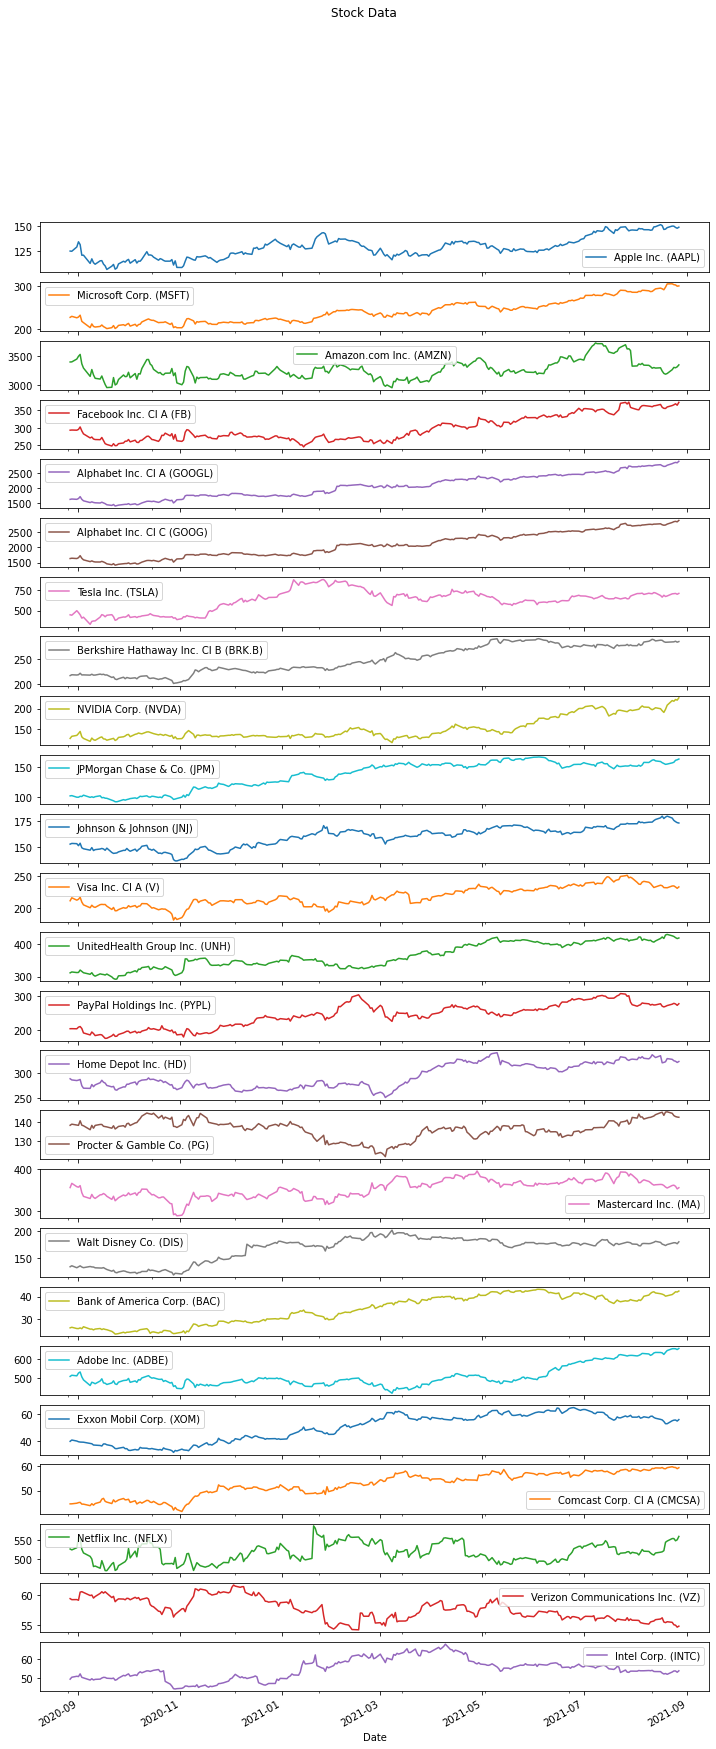

In [36]:
df_stocks.plot(subplots = True, title = "Stock Data", figsize = (12, 30));

# Visualisation of stock price variations for the S&P top 25 companies

### 3.2 Benchmark

<AxesSubplot:title={'center':'Benchmark Data'}, xlabel='Date'>

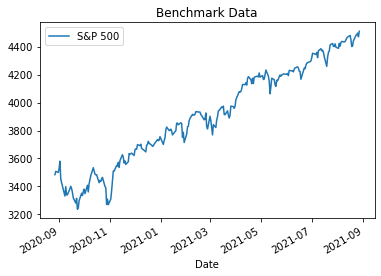

In [22]:
df_benchmark.plot(title = "Benchmark Data")

# Visualisation of the benchmark values

## 4 Calculating the Sharpe Ratio

Now we can start converting our market data into inputs for the Sharpe Ratio equation. Notice that $R_p$ denotes the return from the portfolio, while our `df_stocks` simply contain daily stock prices. Therefore, we first need to calculate the daily returns for all 25 firms by comparing the price on each day with that on the previous day.

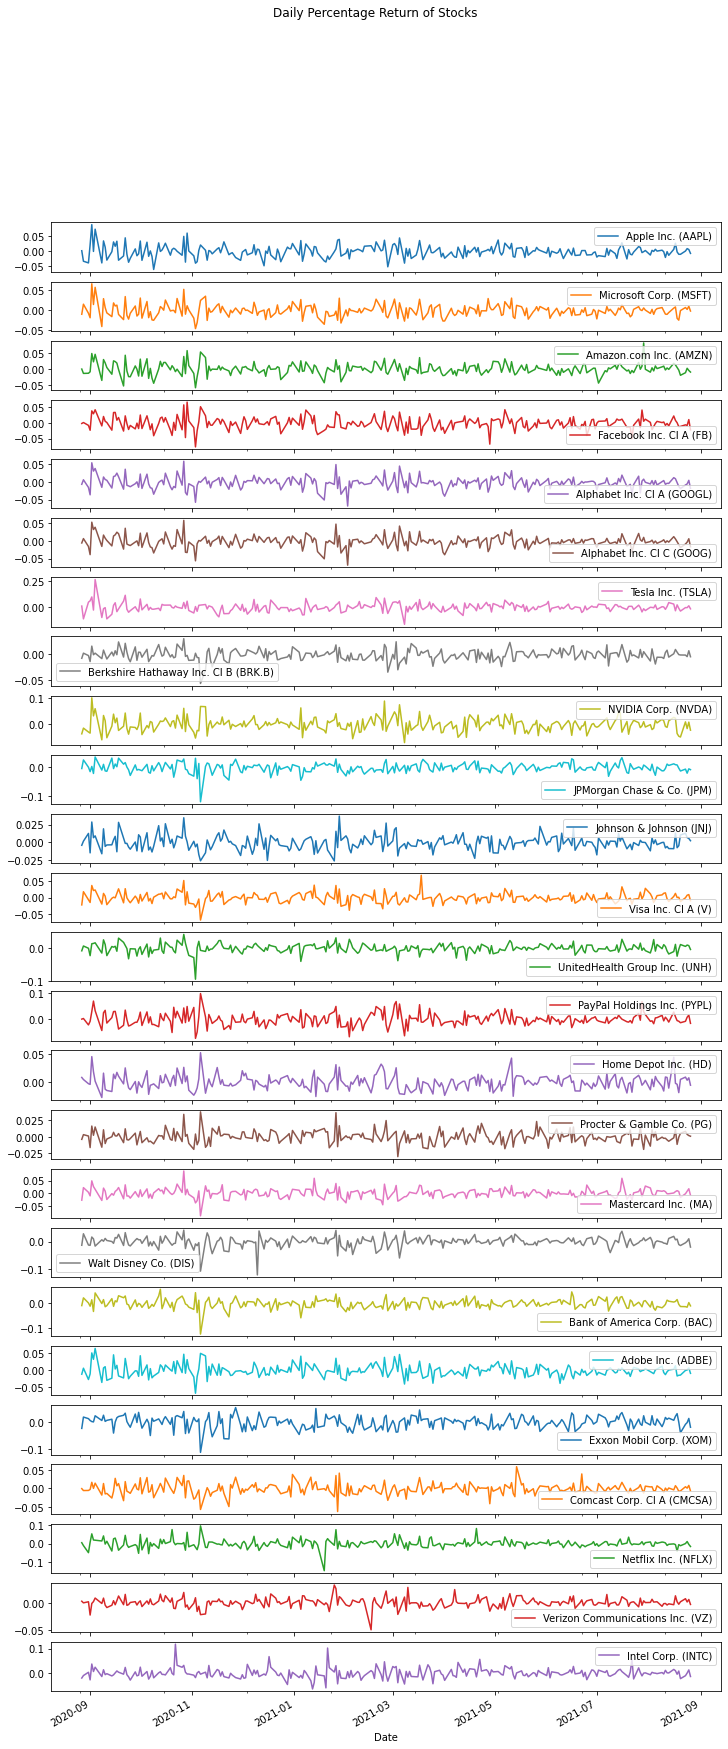

In [37]:
returns = df_stocks.pct_change()
returns.plot(subplots = True, title = "Daily Percentage Return of Stocks", figsize = (12, 30));

# The in-built Pandas function pct_change() calculates the percentage change between two adjacent data points

These plots are very informative, as we can tell that a positive percentage change means an increase in the stock price. In contrast, a percentage change below zero indicates that the stock price has dropped that day.

Now, we perform the same operation on the benchmark data.

<AxesSubplot:title={'center':'Benchmark Daily Percentage Return'}, xlabel='Date'>

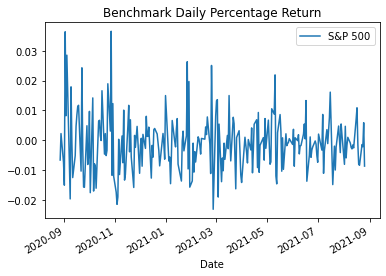

In [24]:
returns_benchmark = df_benchmark.pct_change()
returns_benchmark.plot(title = "Benchmark Daily Percentage Return")

Now, we can finally start calculating $R_p - R_f$, which is the numerator of the Sharpe Ratio.

In [32]:
Rp_minus_Rf = returns.sub(returns_benchmark["S&P 500"], axis = 0) # Performs the subtraction

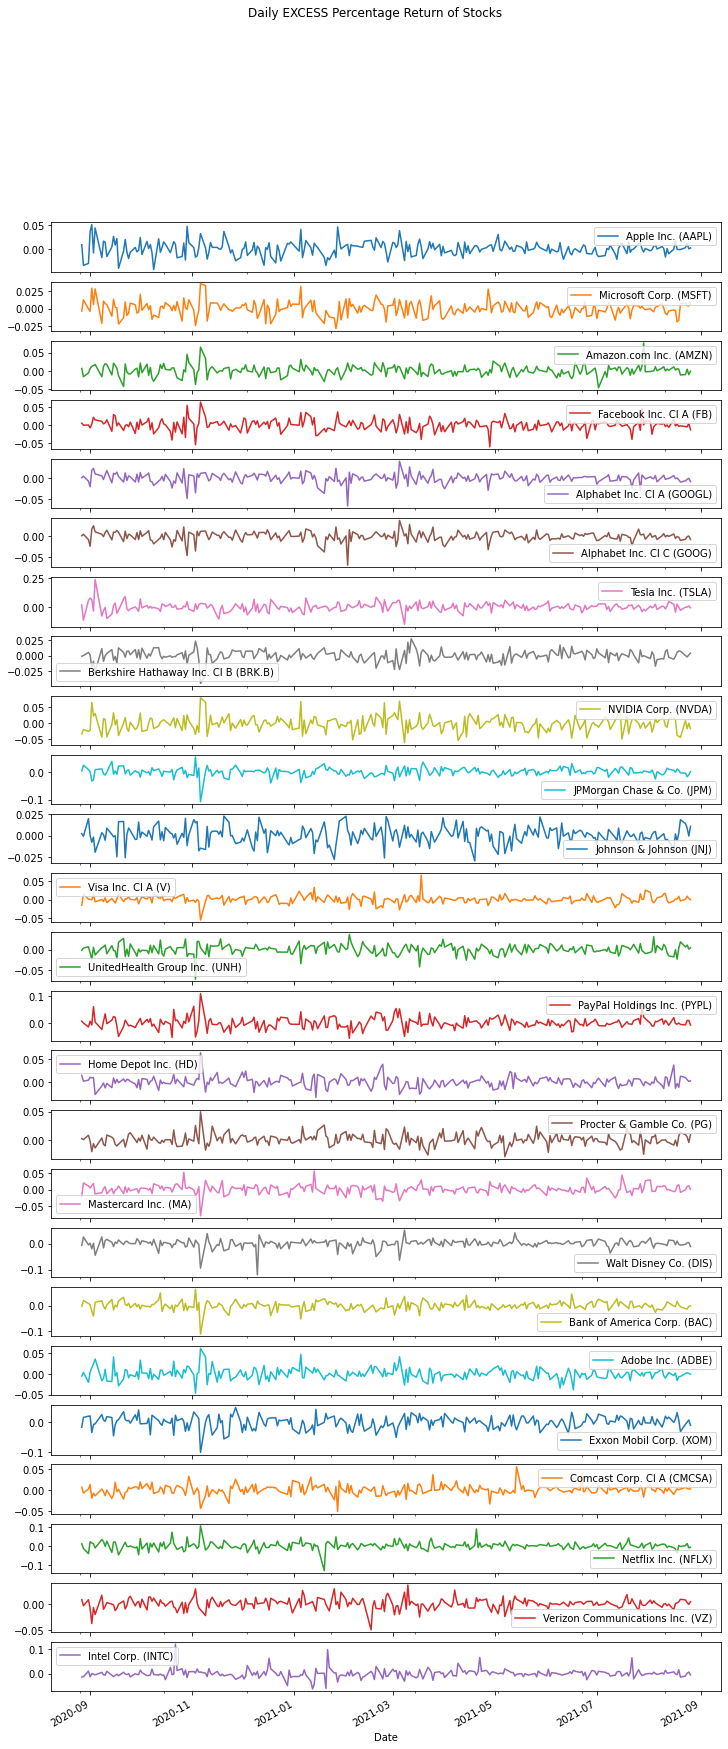

In [35]:
Rp_minus_Rf.plot(subplots = True, title = "Daily EXCESS Percentage Return of Stocks", figsize = (12, 30));

The plots we have here are the excess returns of stocks over a one year period. To calculate the Sharpe Ratio we must find the AVERAGE daily excess returns of all 25 stocks. This is simply achieved as follows and plotted as a bar graph.

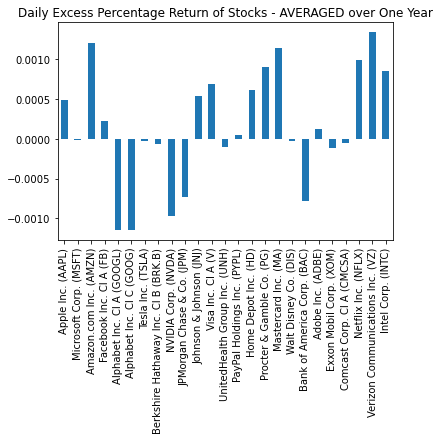

In [38]:
Rp_minus_Rf_avg = Rp_minus_Rf.mean()
Rp_minus_Rf_avg.plot.bar(title = "Daily Excess Percentage Return of Stocks - AVERAGED over One Year");

Now, the last thing we need is the standard deviation of the daily excess percentage returns. This can also be simply achieved with a Pandas' built-in function.

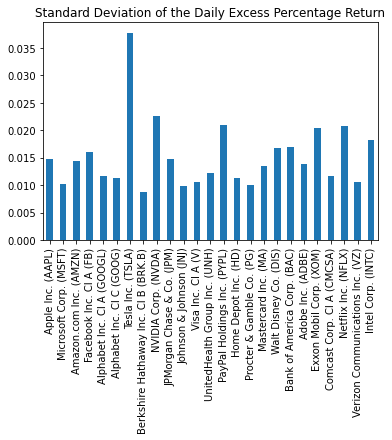

In [40]:
Rp_minus_Rf_std = Rp_minus_Rf.std()
Rp_minus_Rf_std.plot.bar(title = "Standard Deviation of the Daily Excess Percentage Return");

Finally, the moment we have all been waiting for. 

In [41]:
daily_sharpe_ratio = Rp_minus_Rf_avg.div(Rp_minus_Rf_std) # daily Sharpe Ratio!

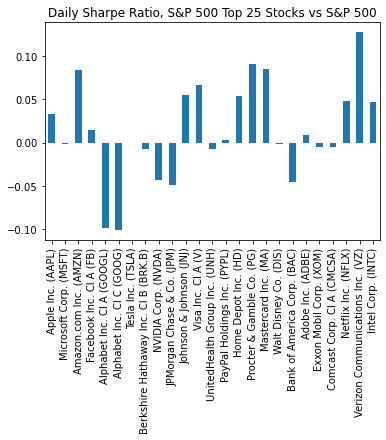

In [43]:
daily_sharpe_ratio.plot.bar(title = "Daily Sharpe Ratio, S&P 500 Top 25 Stocks vs S&P 500");

## 5 Conclusions

The most obvious conclusion from the result above is that you should probably consider investing in those company stocks with positive Sharpe Ratios, such as Apple, Amazon, Facebook etc.

However, we must evaluate our data collection and calculation methods critically. There are many aspects of this project that can be improved.

1) The stock prices were collected over a one-year period only. The variation in the stock price of a company in one year is hardly persuasive of its future outlook. There could have been unpredictable events that have affected some of the companies, such as COVID-19. A timeframe of one year is certainly not enough to offset, or at least attenuate the massive impact of such events.

2) The Sharpe Ratio is not the only way of assessing investment risk vs. return. There are similar metrics such as the Sortino Ratio and the Treynor Ratio. Most successful investors rely on and evaluate multiple metrics and indices rather than a single one.

3) What is the significance in doing an analysis like this? We know the reason that the Sharpe Ratio of Amazon is nearly three times that of Apple, is not that investing in Amazon poses a much lower risk. In fact, if we examine the standard deviation bar plot, we will see that the risks of investing in these two companies are virtually equivalent. Amazon has a higher Sharpe Ratio, simply because its average return is three times that of Apple. 

The main idea is that investing in any of the S&P 500 Top 25 candidates would pose a similarly low risk (except for Tesla, perhaps, as seen the standard deviation bar plot) because they are all well-established companies with predictably stable future outlooks. The significance of the Sharpe Ratio is therefore, unfortunately, dimished in this sense. 

To address these issues, we can:

1) Collect stock price data over a longer period of time.

2) Evaluate the stokcs' risk vs. return with the aid of multiple metrics instead of only one.

3) Consider a more diverse selection of companies with hard-to-predict trends in their stock prices. Uncertainty is one of the central ideas of investment; therefore, such a selection would model the real investment world more realistically. 

In [ ]:
# proofread! check for spelling & grammar mistakes